In [1]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"

In [4]:
%load_ext autoreload
%autoreload 2

In [3]:
%run run_gradually_increasing_angle

  0%|          | 0/5958 [00:00<?, ?it/s]

  0%|          | 0/5958 [00:00<?, ?it/s]

  0%|          | 0/5958 [00:00<?, ?it/s]

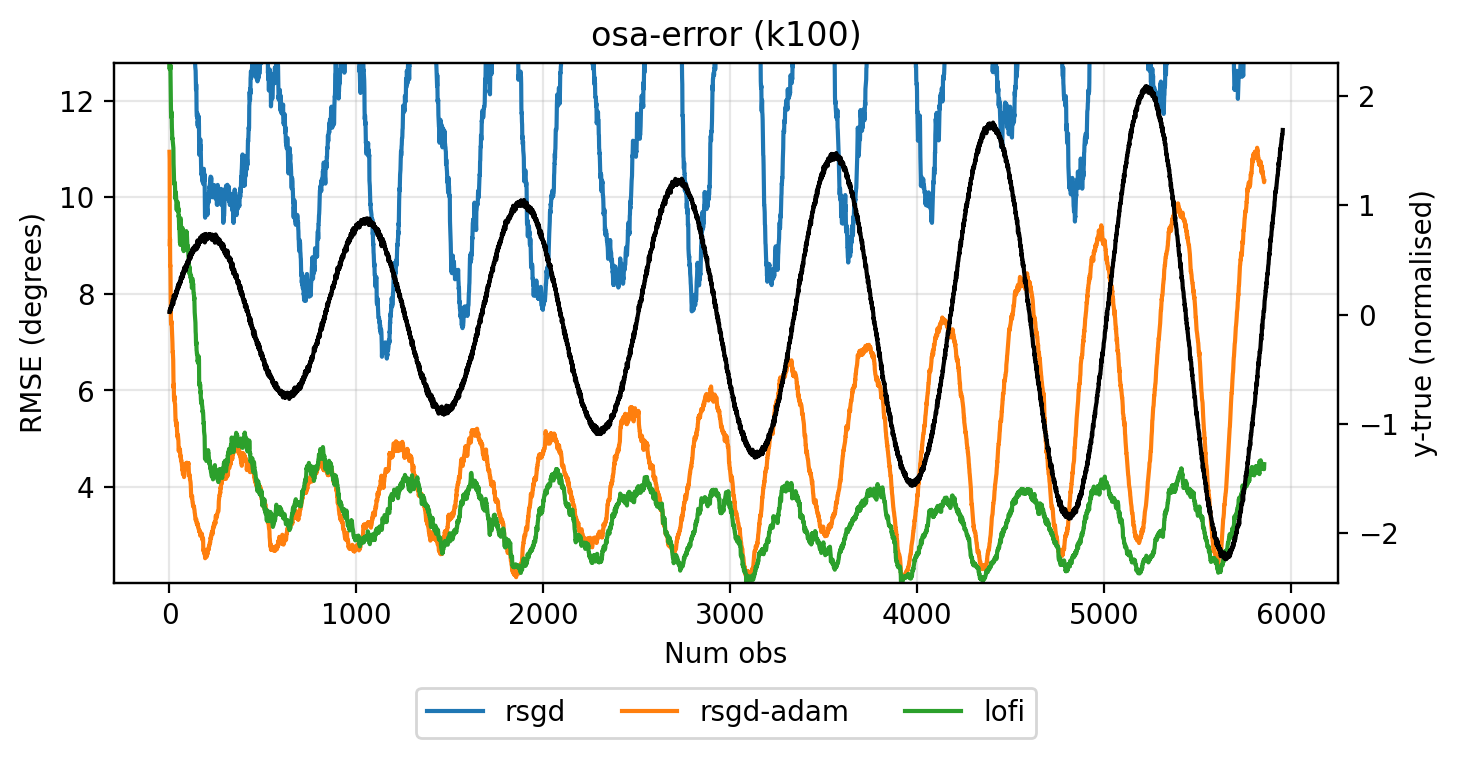

In [9]:
stat = "osa-error"

fig, ax = plt.subplots(figsize=(7, 4))
ax2 = ax.twinx()
err_rsgd = output_rsgd[stat]
err_rsgd_adam = output_rsgd_adam[stat]
err_lofi = output_lofi[stat]

err_rsgd = np.convolve(err_rsgd, kernel, mode="valid")
err_rsgd_adam = np.convolve(err_rsgd_adam, kernel, mode="valid")
err_lofi = np.convolve(err_lofi, kernel, mode="valid")
keyv = f"osa-error (k{ksize})"

vmax = np.quantile(err_lofi, 1.0)
vmin = np.quantile(err_lofi, 0.00)
ax.plot(err_rsgd, label="rsgd")
ax.plot(err_rsgd_adam, label="rsgd-adam")
ax.plot(err_lofi, label="lofi")
ax2.plot(Y_train, c="black")

ax.set_ylim(vmin, vmax)
ax.set_title(keyv)
ax.legend(fontsize=10, ncols=3, bbox_to_anchor=(0, 0, 1, -0.5), loc="center")
plt.tight_layout()

ax.set_ylabel("RMSE (degrees)")
ax2.set_ylabel("y-true (normalised)")
ax.set_xlabel("Num obs")

ax.grid(alpha=0.3)